Statistiques des prix par compagnie:
                        count        mean         std    min     25%    50%  \
airlines                                                                      
Aer Lingus                4.0  227.500000  117.854430  147.0  154.50  181.5   
Air France              824.0  134.256068   78.658675   70.0   89.00  109.0   
British Airways          16.0  181.312500   91.642580  108.0  116.75  134.0   
Iberia                   27.0  121.148148   74.570928   74.0   78.00  104.0   
KLM                     282.0  113.801418   48.965413   71.0   87.00  104.0   
Lufthansa                 6.0  270.000000  199.193373  152.0  152.00  170.5   
SNCF                    103.0  173.485437   98.083584   58.0   88.00  144.0   
SWISS                     7.0  358.000000  193.551027  160.0  161.00  383.0   
Scandinavian Airlines     2.0  228.000000   11.313708  220.0  224.00  228.0   
Volotea                 129.0  193.403101   97.502926   79.0  133.00  160.0   
Vueling        

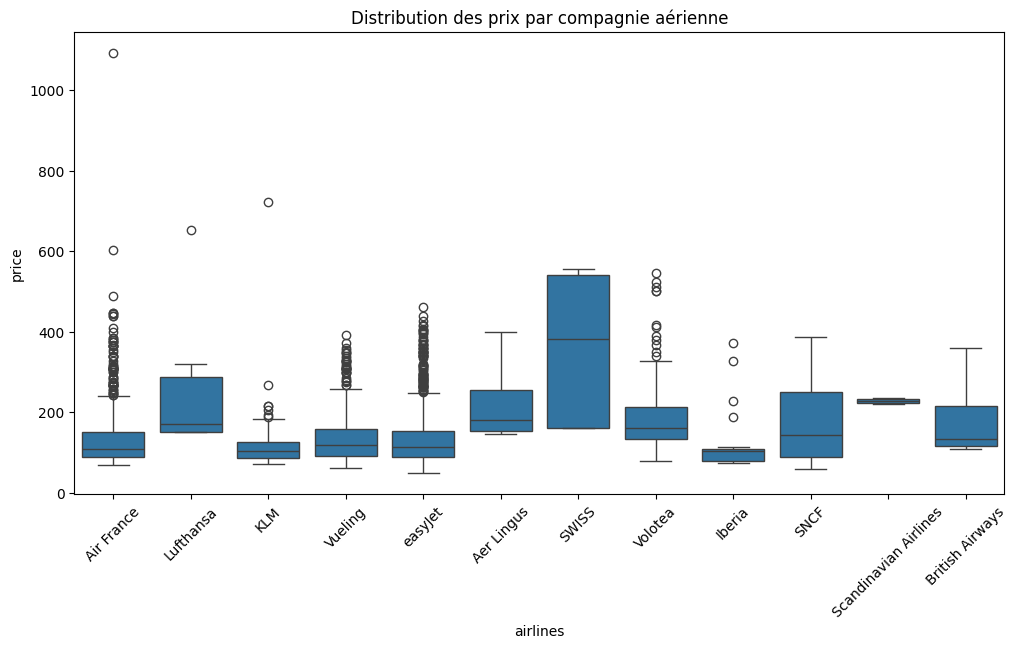

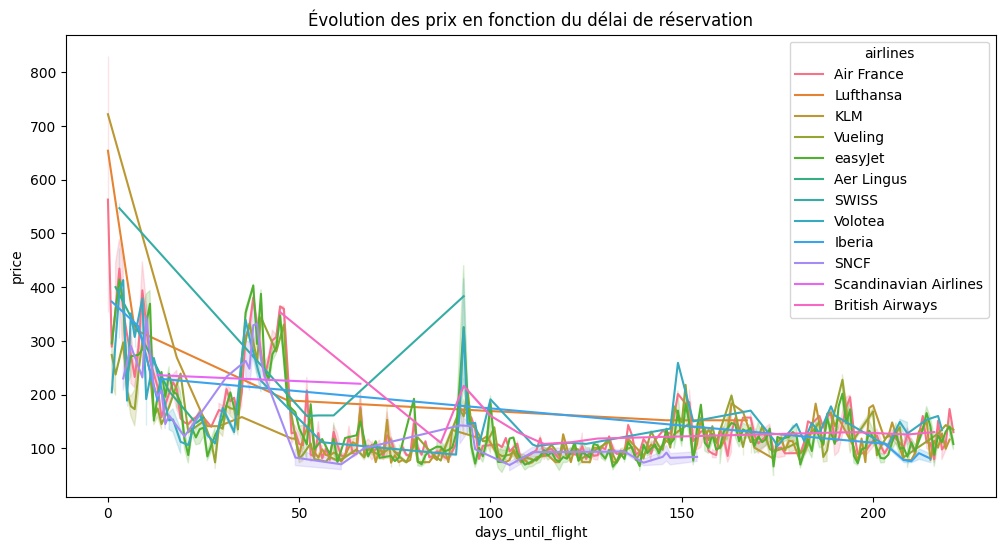

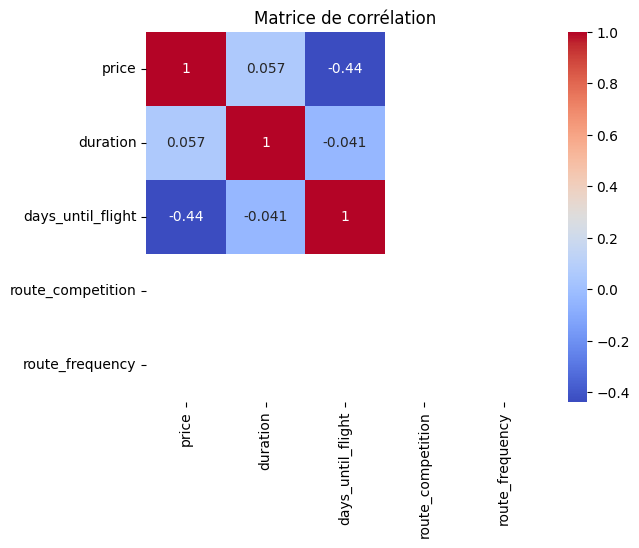

In [2]:
import sys
sys.path.append('..')
from src.data.feature_builder import FlightFeatureBuilder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Initialisation
data_path = Path('../data')
feature_builder = FlightFeatureBuilder(data_path)

# Chargement et préparation des données
df_ams = feature_builder.process_destination('AMS')

# Analyse des prix
print("Statistiques des prix par compagnie:")
print(df_ams.groupby('airlines')['price'].describe())

# Visualisation de la distribution des prix
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ams, x='airlines', y='price')
plt.xticks(rotation=45)
plt.title('Distribution des prix par compagnie aérienne')
plt.show()

# Analyse temporelle des prix
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ams, x='days_until_flight', y='price', hue='airlines')
plt.title('Évolution des prix en fonction du délai de réservation')
plt.show()

# Analyse des corrélations
correlation_matrix = df_ams[['price', 'duration', 'days_until_flight', 
                           'route_competition', 'route_frequency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()